# 5: Forecasting with Moving Averages and Autoregressive Models

In [21]:
from datetime import datetime
import yfinance as yf

import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import matplotlib.pyplot as plt

In [3]:
%load_ext lab_black

In [4]:
start_date = datetime(2005, 1, 1)
end_date = datetime(2021, 1, 1)
df = yf.download("SPY", start=start_date, end=end_date)

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Date')

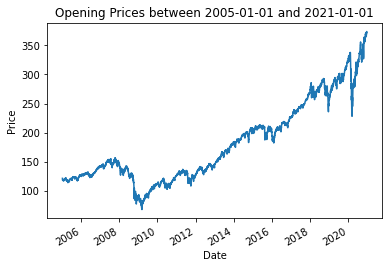

In [6]:
plt.title(
    "Opening Prices between {} and {}".format(
        start_date.date().isoformat(), end_date.date().isoformat()
    )
)
df["Open"].plot()
plt.ylabel("Price")
plt.xlabel("Date")

In [26]:
df1 = df.reset_index().resample("W", on="Date")["Open"].mean()
df1 = df1[df1.index.isocalendar().week < 53]
df1.head()

Date
2005-01-09    119.634000
2005-01-16    118.398000
2005-01-23    118.290001
2005-01-30    117.200000
2005-02-06    118.663998
Name: Open, dtype: float64

In [27]:
df1 = df1.asfreq("W").fillna(method="ffill")

In [28]:
df1.head()

Date
2005-01-09    119.634000
2005-01-16    118.398000
2005-01-23    118.290001
2005-01-30    117.200000
2005-02-06    118.663998
Freq: W-SUN, Name: Open, dtype: float64

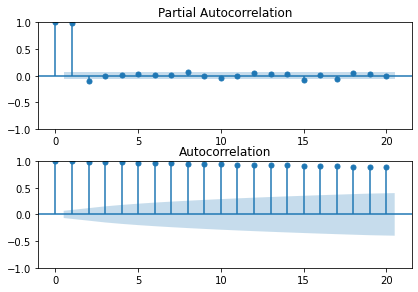

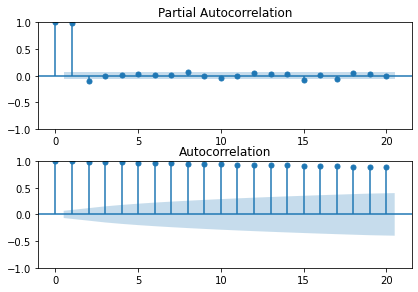

In [35]:
fig, axs = plt.subplots(2)
fig.tight_layout()
sm.graphics.tsa.plot_pacf(df1, lags=20, ax=axs[0], method="yw")
sm.graphics.tsa.plot_acf(df1, lags=20, ax=axs[1])

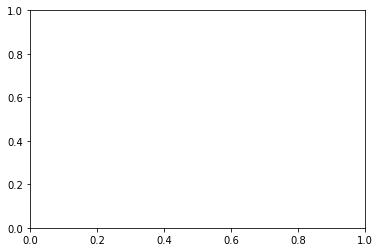

In [39]:
fig, axs = plt.subplots(1)

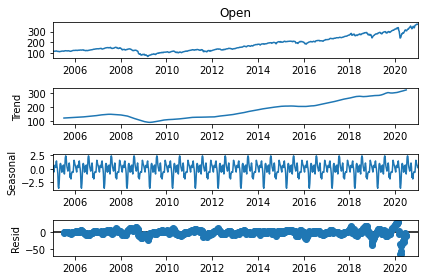

In [40]:
result = seasonal_decompose(df1, model="additive", period=52)
result.plot()
plt.show()